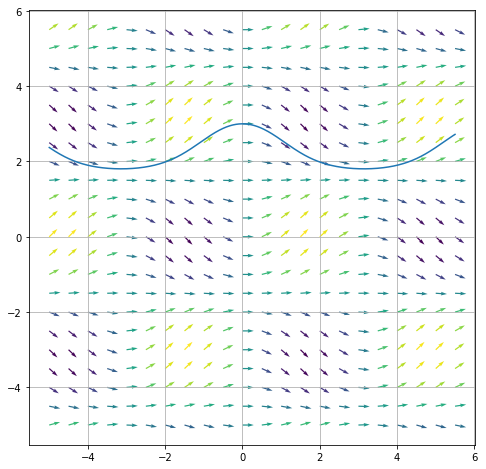

In [239]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
from ipywidgets import interact

def eulers_method(f_xy, xlim, ylim, p0, h=0.001):
    xs = [p0[0]]
    ys = [p0[1]]
    while True:
        xn = xs[-1] + h
        yn = ys[-1] + h*f_xy(xs[-1], ys[-1])
        if xn > xlim[-1] or (ylim[0] > yn or yn > ylim[-1]): break
        xs.append(xn)
        ys.append(yn)
    while True:
        xn = xs[0] - h
        yn = ys[0] - h*f_xy(xs[0], ys[0])
        if xn < xlim[0] or (ylim[0] > yn or yn > ylim[-1]): break
        xs[:] = [xn] + xs
        ys[:] = [yn] + ys
    return (xs, ys)
        

def direction_field(f_xy, x_range, y_range, p0=None):
    xx, yy = np.meshgrid(x_range, y_range)
    
    fxy = f_xy(xx, yy)
    nfxy = np.sqrt(fxy**2+1**2)
    u = 1/nfxy
    v = fxy/nfxy 
    
    plt.grid(True)
    plt.quiver(xx, yy, u, v, np.arctan2(v, u))
    if p0 is not None:
        plt.plot(*eulers_method(f_xy, x_range, y_range, p0))
        
    plt.show()    

r = 5
h = 2
x = np.arange(-r, r+1, 1/h)
y = np.arange(-r, r+1, 1/h)

f_xy = lambda x, y : np.sin(x)*np.cos(y)
#f_xy = lambda x, y : y
direction_field(f_xy, x, y, (0,3))


In [ ]:
r = 6
h = 2
x = np.arange(-r, r+1, 1/h)
y = np.arange(-r, r+1, 1/h)

@interact
def plotter(a = 1.0, x0=(x[0], x[-1]), y0=(y[0], y[-1])):  
    f_xy = lambda x, y : np.log(a)*(x*np.sin(y))
    direction_field(f_xy, x, y, (x0,y0))

: 